# Jungho John Ro Homework 4 WeatherPy
----

### Analysis
* It's not surprising to see that Max Temperature is higher when closer to the equator, however the cities in the southern hemisphere seem to have higher max temps than the northern hemisphere (December Solstice).   
* There is a cluster of cities that have a 100% humidity that lie between a latitude -20 and 10. 
* For cloudiness it is interesting to see majority of the cities lie in 4 major categories: 0%, 20%, 40%, and right around 80%. 

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Creating Dataframe to store results needed for scatter plots
cities_df = pd.DataFrame({"Cities":cities})

# Creating Columns for the data needed in Dataframe
cities_df["Cloudiness"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df["Humidity"] = ""
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Wind Speed"]= ""

cities_df.head()

,Cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,cape town,,,,,,,,
1,kutum,,,,,,,,
2,daru,,,,,,,,
3,ponta do sol,,,,,,,,
4,tautira,,,,,,,,


In [4]:
# Print the Start of the Log of data
print("Beginning Data Retrieval")
print("--------------------------")

# The 
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"

for index, row in cities_df.iterrows():
    city = row['Cities']
    cities = str(city)
    weather_url = base_url + "&appid=" + api_key + "&q=" + cities
    city_weather = requests.get(weather_url).json()
    try:
        cities_df.loc[index, "Cloudiness"] = city_weather["clouds"]["all"]
        cities_df.loc[index, "Country"] = city_weather["sys"]["country"]
        cities_df.loc[index, "Date"] =  city_weather["dt"]
        cities_df.loc[index, "Humidity"] = city_weather["main"]["humidity"]
        cities_df.loc[index, "Lat"] = city_weather["coord"]["lat"]
        cities_df.loc[index, "Lng"] = city_weather["coord"]["lon"]
        cities_df.loc[index, "Max Temp"] = city_weather["main"]["temp_max"]
        cities_df.loc[index, "Wind Speed"] = city_weather["wind"]["speed"]
        print(f'Processing Record | {city}')
    except:
        print("City not found. Skipping...")

print("--------------------------")
print("Data Retrieval Complete")
print("--------------------------")

Beginning Data Retrieval
--------------------------
Processing Record | cape town
Processing Record | kutum
Processing Record | daru
Processing Record | ponta do sol
Processing Record | tautira
Processing Record | saint-philippe
Processing Record | albany
City not found. Skipping...
Processing Record | hobart
Processing Record | shellbrook
Processing Record | mataura
Processing Record | fortuna
Processing Record | rikitea
Processing Record | asyut
Processing Record | castro
Processing Record | ushuaia
Processing Record | dunedin
Processing Record | jining
Processing Record | wonthaggi
Processing Record | praia da vitoria
Processing Record | santa josefa
Processing Record | bredasdorp
Processing Record | luderitz
Processing Record | tabuk
Processing Record | alyangula
Processing Record | nikolskoye
City not found. Skipping...
Processing Record | arraial do cabo
Processing Record | san patricio
Processing Record | marsa matruh
Processing Record | busselton
Processing Record | mahebourg
P

Processing Record | northfield
Processing Record | moree
Processing Record | general salgado
Processing Record | recife
Processing Record | miandrivazo
Processing Record | makokou
Processing Record | port alfred
Processing Record | guerrero negro
Processing Record | leningradskiy
Processing Record | solaro
City not found. Skipping...
Processing Record | iquitos
Processing Record | zabid
Processing Record | zeya
Processing Record | edgewater
Processing Record | san cristobal
Processing Record | sorong
City not found. Skipping...
Processing Record | domaszek
Processing Record | jawhar
Processing Record | tsaratanana
Processing Record | safford
City not found. Skipping...
Processing Record | altagracia de orituco
Processing Record | longkou
Processing Record | zhigansk
City not found. Skipping...
City not found. Skipping...
Processing Record | teya
Processing Record | port augusta
Processing Record | faanui
Processing Record | balclutha
Processing Record | la primavera
Processing Record |

City not found. Skipping...
Processing Record | road town
Processing Record | jinji
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record | yining
Processing Record | ugoofaaru
City not found. Skipping...
Processing Record | milkovo
Processing Record | ginir
Processing Record | lima
Processing Record | kajaani
Processing Record | broome
Processing Record | bundibugyo
City not found. Skipping...
Processing Record | estevan
Processing Record | cairns
Processing Record | zyryanka
Processing Record | astana
Processing Record | cavalcante
Processing Record | muhos
Processing Record | xinzhi
Processing Record | chumikan
Processing Record | doraha
Processing Record | key biscayne
Processing Record | behbahan
Processing Record | yazman
Processing Record | havoysund
Processing Record | bintulu
Processing Record | vestmanna
Processing Record | pamekasan
City not found. Skipping...
Processing Record | vanavara
Processing Record | kloulklubed
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities_df.to_csv('cities.csv')

cities_df.count()

Cities        600
Cloudiness    600
Country       600
Date          600
Humidity      600
Lat           600
Lng           600
Max Temp      600
Wind Speed    600
dtype: int64

In [6]:
cities_df.head()

,Cities,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,cape town,20,ZA,1554338721,82,-33.93,18.42,59,5.82
1,kutum,0,SD,1554338745,35,14.2,24.66,57.83,5.17
2,daru,80,SL,1554338835,95,7.99,-10.85,73.67,3.94
3,ponta do sol,68,BR,1554338691,90,-20.63,-46,67.64,4.83
4,tautira,75,PF,1554338544,70,-17.73,-149.15,87.8,12.75


In [7]:
cities_df["Cloudiness"] = pd.to_numeric(cities_df["Cloudiness"])
cities_df["Humidity"] = pd.to_numeric(cities_df["Humidity"])
cities_df["Lat"] = pd.to_numeric(cities_df["Lat"])
cities_df["Max Temp"] = pd.to_numeric(cities_df["Max Temp"])
cities_df["Wind Speed"] = pd.to_numeric(cities_df["Wind Speed"])

cities_df.dtypes

Cities         object
Cloudiness    float64
Country        object
Date           object
Humidity      float64
Lat           float64
Lng            object
Max Temp      float64
Wind Speed    float64
dtype: object

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

/Users/junghoro/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


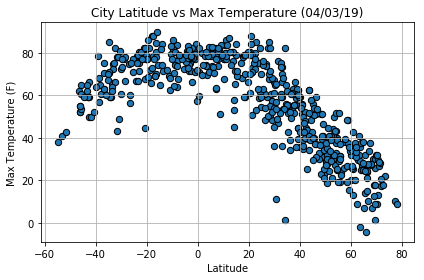

<Figure size 432x288 with 0 Axes>

In [8]:
cities_df.plot(kind="scatter", x="Lat", y="Max Temp", 
               s=40, grid="True", edgecolors="black")
plt.title("City Latitude vs Max Temperature (04/03/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.tight_layout()
plt.show()
plt.savefig("Latitude vs. Temperature Plot.png")

#### Latitude vs. Humidity Plot

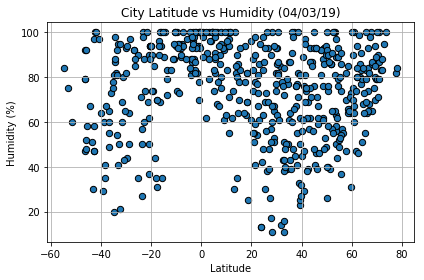

<Figure size 432x288 with 0 Axes>

In [9]:
cities_df.plot(kind="scatter", x="Lat", y="Humidity", 
               s=40, grid="True", edgecolors="black")
plt.title("City Latitude vs Humidity (04/03/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.tight_layout()
plt.show()
plt.savefig("Latitude vs. Humidity Plot.png")

#### Latitude vs. Cloudiness Plot

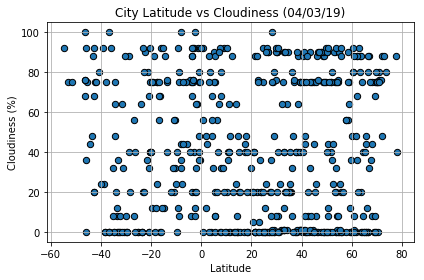

<Figure size 432x288 with 0 Axes>

In [10]:
cities_df.plot(kind="scatter", x="Lat", y="Cloudiness", 
               s=40, grid="True", edgecolors="black")
plt.title("City Latitude vs Cloudiness (04/03/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.tight_layout()
plt.show()
plt.savefig("Latitude vs. Cloudiness Plot.png")

#### Latitude vs. Wind Speed Plot

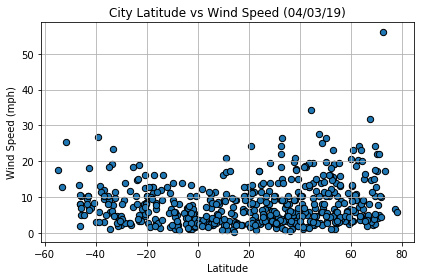

<Figure size 432x288 with 0 Axes>

In [11]:
cities_df.plot(kind="scatter", x="Lat", y="Wind Speed", 
               s=40, grid="True", edgecolors="black")
plt.title("City Latitude vs Wind Speed (04/03/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.tight_layout()
plt.show()
plt.savefig("Latitude vs. Wind Speed Plot.png")